<a href="https://colab.research.google.com/github/SupriyaRani/Multimodal-Fusion-on-AVSD/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import pickle
import logging
import numpy as np
import torch
import torch.utils.data
from torch.utils.data import Dataset
from itertools import chain
import tarfile
from argparse import ArgumentParser
#from utils.meta.dataset import get_dataset, build_input_from_segments
#from utils.meta.VideoGPT2 import *
#from utils.meta.train import SPECIAL_TOKENS, SPECIAL_TOKENS_DICT
#!pip install tensorflow --upgrade --force-reinstall
import tensorflow as tf

In [ ]:
import pandas as pd
import json
from pandas import json_normalize
import re

text_data = json.load(open('./data/annotations/test_set.json','r'))
text_data = json_normalize(text_data['dialogs']) 
text_data = text_data.explode('dialog').reset_index(drop=True)
text_data = text_data.join(pd.json_normalize(text_data.dialog)).drop(columns=['dialog'])
text_data.head()


,image_id,summary,caption,answer,question
0,YSE1G,the girl walks into a room with a dog with a t...,a person walked through a doorway into the liv...,there is only one person and a dog .,is there only one person ?
1,YSE1G,the girl walks into a room with a dog with a t...,a person walked through a doorway into the liv...,she walks in from outside with the towel aroun...,does she walk in with a towel around her neck ?
2,YSE1G,the girl walks into a room with a dog with a t...,a person walked through a doorway into the liv...,she does not interact with the dog,does she interact with the dog ?
3,YSE1G,the girl walks into a room with a dog with a t...,a person walked through a doorway into the liv...,she dropped the towel on the floor at the end ...,does she drop the towel on the floor ?
4,YSE1G,the girl walks into a room with a dog with a t...,a person walked through a doorway into the liv...,there was nothing else interacting but before ...,so she walks in to a room with a dog and drops...


In [ ]:
img_list = list(text_data['image_id'])

In [ ]:
text_data.shape

(7330, 5)

In [ ]:
text_data['image_id'].value_counts()

MUE2B    10
ZND9F    10
S591U    10
J56G6    10
IKJGO    10
         ..
U9NI5    10
1F4JZ    10
HYOQB    10
1GGRY    10
YLEEO    10
Name: image_id, Length: 733, dtype: int64

In [ ]:
text_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7330 entries, 0 to 7329
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  7330 non-null   object
 1   summary   7330 non-null   object
 2   caption   7330 non-null   object
 3   answer    7330 non-null   object
 4   question  7330 non-null   object
dtypes: object(5)
memory usage: 286.5+ KB


In [ ]:
text_data.isnull().sum()

image_id    0
summary     0
caption     0
answer      0
question    0
dtype: int64

In [ ]:
#for text cleaning
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing import text, sequence


In [ ]:
text_data['question']=text_data['question'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
text_data['answer']=text_data['answer'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
text_data['summary']=text_data['summary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
# Removing extra spaces
text_data['question']=text_data['question'].apply(lambda x: re.sub(' +',' ',x))
text_data['answer']=text_data['answer'].apply(lambda x: re.sub(' +',' ',x))
text_data['summary']=text_data['summary'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
for index,text in enumerate(text_data['question'][35:40]):
    print('summary %d:\n'%(index+1),text)

summary 1:
 how old is he there 
summary 2:
 what room is it 
summary 3:
 what color is the room 
summary 4:
 do they appear happy 
summary 5:
 are they indian people 


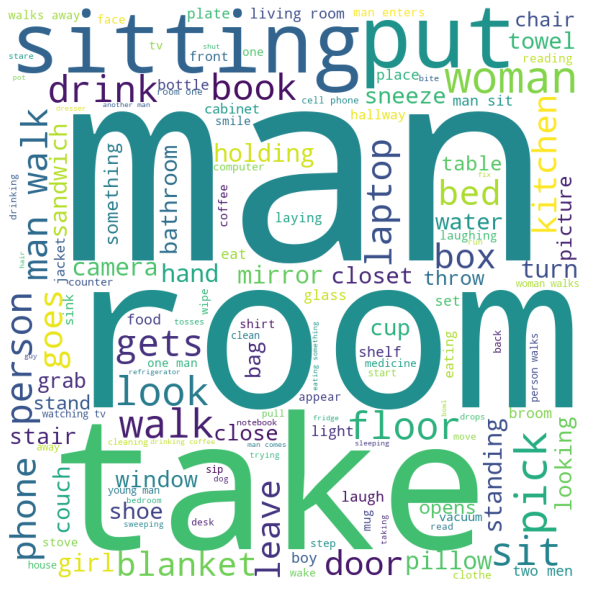

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
# Reads 'Youtube04-Eminem.csv' file
df = text_data
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df['summary']:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
#my_tar = tarfile.open('./data/annotations.tar')
#my_tar.extractall('./data/annotations') # specify which folder to extract to
#my_tar.close()

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KASISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KASISH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]


words = basic_clean(''.join(str(df['question'].tolist())))

Text(0.5, 0, '# of Occurances')

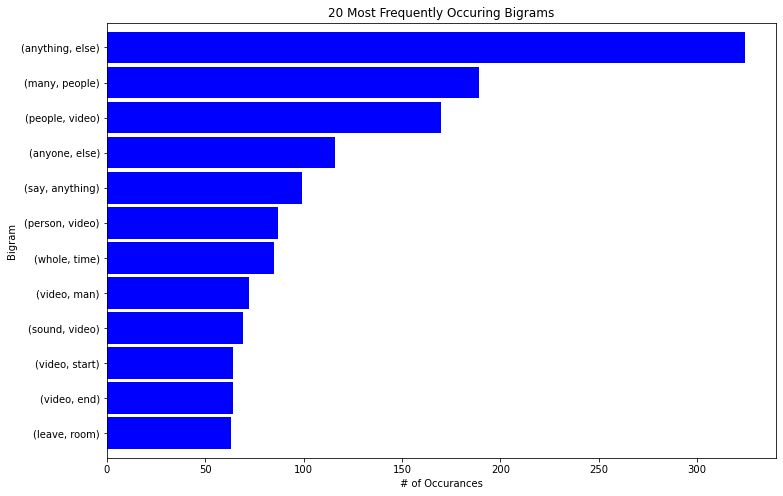

In [ ]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

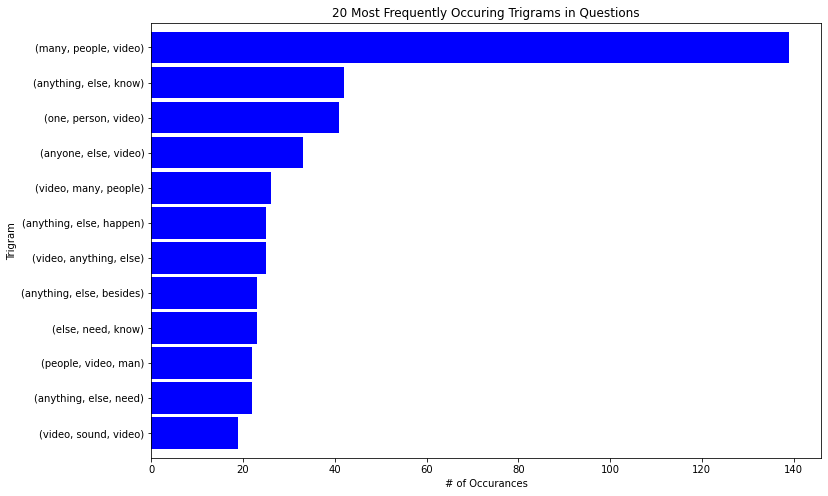

In [ ]:
trigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams in Questions')
plt.ylabel('Trigram')
plt.xlabel('# of Occurances')

In [ ]:
#import urllib.request
#urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

In [ ]:
#!unzip "/data/glove.6B.zip" -d "./data/"

In [ ]:
#!pip install -q -U "tensorflow-text==2.8.*"
#!pip install -q tf-models-official==2.4.0

In [ ]:
questions =text_data.question.str.lower().tolist()
summary =text_data.summary.str.lower().tolist()
dialogues =text_data.caption.str.lower().tolist()
answer = text_data.answer.str.lower().tolist()

In [ ]:
df = text_data

In [ ]:
%%time
def clean_text(txt):
    """""
    cleans the input text in the following steps
    1- replace contractions
    2- removing punctuation
    3- spliting into words
    4- removing stopwords
    5- removing leftover punctuations
    """""
    contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
    def _get_contractions(contraction_dict):
        contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
        return contraction_dict, contraction_re

    def replace_contractions(text):
        contractions, contractions_re = _get_contractions(contraction_dict)
        def replace(match):
            return contractions[match.group(0)]
        return contractions_re.sub(replace, text)

    # replace contractions
    txt = replace_contractions(txt)
    
    #remove punctuations
    txt  = "".join([char for char in txt if char not in string.punctuation])
    txt = re.sub('[0-9]+', '', txt)
    
    # split into words
    words = word_tokenize(txt)
    
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # removing leftover punctuations
    words = [word for word in words if word.isalpha()]
    
    cleaned_text = ' '.join(words)
    return cleaned_text
    
df['summary_cleaned'] = df['summary'].apply(lambda txt: clean_text(txt))


Wall time: 4.05 s


In [ ]:
X = df.drop('answer', axis = 1)
y = df['answer']

#split data in test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [ ]:
y_train

7050                              she os putting on shoes
5264                          she is not wearing glasses 
5847          he is eating a sandwich and fixing the knob
785                    no she doesn t even reach into it 
6100    yes he stands there cradling the blankets back...
                              ...                        
1791                yes there is only one person present 
5481    there is no coffee made or being made the room...
1314         there is someone speaking in the background 
5808               it is hard to tell i would say mid day
596                no she stands almost in the same spot 
Name: answer, Length: 5864, dtype: object

In [ ]:
# find the length of the largest sentence in training data
L_s = x_train['summary'].apply(lambda x: len(x)).max()
L_s

426

In [ ]:
# find the length of the largest sentence in training data
max_len = x_train.apply(lambda x: len(x)).max()
max_len

4911

In [ ]:
max_words = 10000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = max_words)
# create the vocabulary by fitting on x_train text
tokenizer.fit_on_texts(x_train)
# generate the sequence of tokens
xtrain_seq = tokenizer.texts_to_sequences(x_train)
xtest_seq = tokenizer.texts_to_sequences(x_test)

# pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xtest_pad = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = tokenizer.word_index

#print('text example:', x_train)
print('sequence of indices(before padding):', xtrain_seq[0])
print('sequence of indices(after padding):', xtrain_pad[0])

sequence of indices(before padding): [2, 3]
sequence of indices(after padding): [0 0 0 ... 0 2 3]


In [ ]:
%%time
embedding_vectors = {}
with open('data/glove/glove.6B.300d.txt','r',encoding='utf-8') as file:
    for row in file:
        values = row.split(' ')
        word = values[0]
        weights = np.asarray([float(val) for val in values[1:]])
        embedding_vectors[word] = weights
print(f"Size of vocabulary in GloVe: {len(embedding_vectors)}")   


Size of vocabulary in GloVe: 400000
Wall time: 53.5 s


In [ ]:
#initialize the embedding_matrix with zeros
emb_dim = 300
if max_words is not None: 
    vocab_len = max_words 
else:
    vocab_len = len(word_index)
embedding_matrix = np.zeros((vocab_len, emb_dim))
oov_count = 0
oov_words = []
for word, idx in word_index.items():
    if idx < vocab_len:
        embedding_vector = embedding_vectors.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector
        else:
            oov_count += 1 
            oov_words.append(word)
#print some of the out of vocabulary words
print(f'Some out of valubulary words: {oov_words[0:5]}')

Some out of valubulary words: []


# Encoder

In [ ]:
#from keras.models import Sequential
#from keras.layers import Input,Dense, Embedding, GRU, Dropout, Bidirectional, SpatialDropout1D
import keras

max_features = 1000
GRU_DIM = 1
max_len = 7330
q = keras.layers.Input(shape=(max_len,), name='questions')
q1 = tf.expand_dims(q,axis=2, name = 'q_expan')

BiGRU_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True), name = 'bigru_q1')(q1)
BiGRU_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True), name = 'bigru_q2')(BiGRU_1)
BiGRU_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True), name = 'bigru_q3')(BiGRU_2)

q_bar = tf.expand_dims(BiGRU_3,axis=0, name = 'qbar-expan')

m_q = keras.layers.Conv2D(1, (1,1), activation='ReLU')(q_bar)
m_q = keras.layers.Conv2D(2, (1,1), activation='ReLU')(m_q)

Q = tf.keras.layers.Attention(causal=True, score_mode='dot')([q_bar, m_q])
Q = keras.layers.Embedding(input_dim = (max_len), output_dim=(max_len*2), trainable=False)(Q)
Q = keras.layers.Dense(1, activation='ReLU')(Q)

Q = tf.keras.layers.Reshape(target_shape=(max_len*2,), input_shape=(max_len,))(Q)
print(q)
print(Q)
# initialize the model
model_q = keras.models.Model(inputs=q, outputs=Q)
    
#model_q.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_q.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 7330), dtype=tf.float32, name='questions'), name='questions', description="created by layer 'questions'")
KerasTensor(type_spec=TensorSpec(shape=(1, 14660), dtype=tf.float32, name=None), name='reshape/Reshape:0', description="created by layer 'reshape'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]'] 

In [ ]:
for i, layer in enumerate(model_q.layers):
    print(i, layer.name, layer.output_shape, layer.trainable)

0 questions [(None, 7330)] True
1 tf.expand_dims (None, 7330, 1) True
2 bigru_q1 (None, 7330, 6) True
3 bigru_q2 (None, 7330, 4) True
4 bigru_q3 (None, 7330, 2) True
5 tf.expand_dims_1 (1, None, 7330, 2) True
6 conv2d (1, None, 7330, 1) True
7 conv2d_1 (1, None, 7330, 2) True
8 attention (1, None, 7330, 2) True
9 embedding (1, None, 7330, 2, 14660) False
10 dense (1, None, 7330, 2, 1) True
11 reshape (1, 14660) True


In [ ]:
q_bar = model_q.get_layer('bigru_q3').output

In [ ]:
#q_bar = BiGRU_3
q_bar_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_qbar")(q_bar)
print(q_bar_t)

KerasTensor(type_spec=TensorSpec(shape=(None, 7330, 2), dtype=tf.float32, name=None), name='transpose_qbar/transpose:0', description="created by layer 'transpose_qbar'")


In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Embedding, Flatten, GlobalMaxPool1D, Dropout, Conv1D, Concatenate, Lambda
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from keras.backend import cast
from keras.models import Model

In [ ]:
#summary

max_features = 1000
GRU_DIM = 1
s = Input(shape=(max_len,max_features,), name='summary')

BiGRU_s_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True), name = 'bigru_s1')(s)
BiGRU_s_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True), name = 'bigru_s2')(BiGRU_s_1)
BiGRU_s_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=False), name = 'bigru_s3')(BiGRU_s_2)

m_s = tf.keras.layers.Attention(causal=False, score_mode = 'dot', name = 'attn_s')([ BiGRU_s_3,q_bar_t])

m_s = tf.keras.activations.softmax(m_s, axis=-1)
m_s_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_s")(m_s)

m_s_relu = tf.keras.activations.relu([m_s_t,q_bar],1)
S = tf.keras.layers.MaxPooling2D((1,1), padding='same')(m_s_relu)

S = keras.layers.Embedding(input_dim = (max_len*2), output_dim=(max_len*1), trainable=False)(S)
S = tf.keras.layers.Reshape(target_shape=(max_len*2,max_len*2))(S)
S = tf.keras.layers.Resizing(width=1,height=1)(S)
S = tf.keras.layers.Reshape(target_shape=(max_len*2,))(S)
# initialize the model
model_s = Model(inputs=[s,q], outputs=S)
  
model_s.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_s.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 summary (InputLayer)           [(None, 7330, 1000)  0           []                               
                                ]                                                                 
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]']   

In [ ]:
for i, layer in enumerate(model_s.layers):
    print(i, layer.name, layer.output_shape, layer.trainable)

0 questions [(None, 7330)] True
1 tf.expand_dims (None, 7330, 1) True
2 summary [(None, 7330, 1000)] True
3 bigru_q1 (None, 7330, 6) True
4 bigru_s1 (None, 7330, 6) True
5 bigru_q2 (None, 7330, 4) True
6 bigru_s2 (None, 7330, 4) True
7 bigru_q3 (None, 7330, 2) True
8 bigru_s3 (None, 2) True
9 transpose_qbar (None, 7330, 2) True
10 attn_s (None, None, 2) True
11 tf.nn.softmax (None, None, 2) True
12 transpose_s (None, None, 2) True
13 tf.nn.leaky_relu (2, None, 7330, 2) True
14 max_pooling2d (2, None, 7330, 2) True
15 embedding_1 (2, None, 7330, 2, 7330) False
16 reshape_1 (2, 14660, 14660) True
17 resizing (1, 1, 14660) True
18 reshape_2 (1, 14660) True


In [ ]:
#Dialogue

max_features = 1000
GRU_DIM = 1
d = Input(shape=(max_len,max_features,), name='dialogues')

BiGRU_d_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True), name = 'bigru_d1')(d)
BiGRU_d_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True), name = 'bigru_d2')(BiGRU_d_1)
BiGRU_d_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True), name = 'bigru_d3')(BiGRU_d_2)

m_s = tf.keras.layers.Attention(causal=False, score_mode = 'dot', name = 'attn_d')([ BiGRU_d_3,q_bar_t])

m_s = tf.keras.activations.softmax(m_s, axis=-1)
m_s_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_d")(m_s)

m_s_relu = tf.keras.activations.relu([m_s_t,q_bar],1)
D = tf.keras.layers.MaxPooling2D((1,1), padding='same')(m_s_relu)

D = keras.layers.Embedding(input_dim = (max_len), output_dim=(max_len), trainable=False)(D)
D = tf.keras.layers.Reshape(target_shape=(max_len*2,max_len*2))(D)
D = tf.keras.layers.Resizing(width=1,height=1)(D)
D = tf.keras.layers.Reshape(target_shape=(max_len*2,))(D)
# initialize the model
model_d = Model(inputs=[d,q], outputs=D)
  
#model_d.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_d.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 dialogues (InputLayer)         [(None, 7330, 1000)  0           []                               
                                ]                                                                 
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]']   

In [ ]:
for i, layer in enumerate(model_d.layers):
    print(i, layer.name, layer.output_shape, layer.trainable)

0 questions [(None, 7330)] True
1 tf.expand_dims (None, 7330, 1) True
2 dialogues [(None, 7330, 1000)] True
3 bigru_q1 (None, 7330, 6) True
4 bigru_d1 (None, 7330, 6) True
5 bigru_q2 (None, 7330, 4) True
6 bigru_d2 (None, 7330, 4) True
7 bigru_q3 (None, 7330, 2) True
8 bigru_d3 (None, 7330, 2) True
9 transpose_qbar (None, 7330, 2) True
10 attn_d (None, 7330, 2) True
11 tf.nn.softmax_1 (None, 7330, 2) True
12 transpose_d (None, 7330, 2) True
13 tf.nn.leaky_relu_1 (2, None, 7330, 2) True
14 max_pooling2d_1 (2, None, 7330, 2) True
15 embedding_2 (2, None, 7330, 2, 7330) False
16 reshape_3 (2, 14660, 14660) True
17 resizing_1 (1, 1, 14660) True
18 reshape_4 (1, 14660) True


In [ ]:
i3d_rgb = np.load('./data/dataset/i3d_rgb.npy')
i3d_rgb

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.8357845 , ..., 1.0963383 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.20251411, ..., 0.        ,
         0.        , 0.15283173],
        [0.40371868, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.08540872, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 1.4465597 , 0.08390293, ..., 0.5383258 ,
         0.        , 1.1570803 ],
        [0. 

In [ ]:
max_len_i3d_rgb = max([len(i) for i in i3d_rgb])
max_len_i3d_rgb #49

49

In [ ]:
#i3d-rgb- > video

max_features = 1000
GRU_DIM = 1
r = keras.layers.Input(shape=(max_len,2048,), name = 'i3d_rgb_video')

BiGRU_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True))(r)
BiGRU_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True))(BiGRU_1)
BiGRU_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True))(BiGRU_2)

m_s = tf.keras.layers.Attention(causal=True, score_mode = 'dot')([BiGRU_3, q_bar_t])

m_s_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_i3drgb")(m_s)
#m_s_t = tf.expand_dims(m_s_t,axis=0)
print(m_s_t,q_bar)
m_s_relu = tf.keras.activations.relu([m_s_t,q_bar],1)

R = tf.keras.layers.MaxPooling2D((3,3), padding='same')(m_s_relu)

R = keras.layers.Embedding(input_dim = (max_len), output_dim=(max_len*2), trainable=True)(R)

R = tf.keras.layers.Reshape(target_shape=(4888,max_len*2))(R)
R = tf.keras.layers.Resizing(width=1,height=1)(R)
R = tf.keras.layers.Reshape(target_shape=(max_len*2,))(R)

# initialize the model
model_r = keras.models.Model(inputs=[r,q], outputs=R)
    
#model_r.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_r.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 7330, 2), dtype=tf.float32, name=None), name='transpose_i3drgb/transpose:0', description="created by layer 'transpose_i3drgb'") KerasTensor(type_spec=TensorSpec(shape=(None, 7330, 2), dtype=tf.float32, name=None), name='bigru_q3/concat:0', description="created by layer 'bigru_q3'")
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 i3d_rgb_video (InputLayer)     [(None, 7330, 2048)  0      

In [ ]:
vggish_full = np.load('./data/dataset/vggish_full.npy')
vggish_full

max_len_vggish_full = max([len(i) for i in vggish_full])
max_len_vggish_full

128

In [ ]:
#vggish_full -> Audio fatures

max_features = 128
GRU_DIM = 1
a = keras.layers.Input(shape=(max_len,max_features,), name= 'vggish_Audio')

BiGRU_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True))(a)
BiGRU_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True))(BiGRU_1)
BiGRU_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True))(BiGRU_2)

m_s = tf.keras.layers.Attention(causal=True)([BiGRU_3, q_bar_t])

m_s_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_vggish")(m_s)
#m_s_t = tf.expand_dims(m_s_t,axis=0)
m_s_relu = tf.keras.activations.relu([m_s_t,q_bar],1)

A = tf.keras.layers.MaxPooling2D((3,3), padding='same')(m_s_relu)

A = keras.layers.Embedding(input_dim = (max_len), output_dim=(max_len*2), trainable=True)(A)

A = tf.keras.layers.Reshape(target_shape=(4888,max_len*2))(A)
A = tf.keras.layers.Resizing(width=1,height=1)(A)
A = tf.keras.layers.Reshape(target_shape=(max_len*2,))(A)

# initialize the model
model_a = keras.models.Model(inputs=[a,q], outputs=A)
    
#model_a.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_a.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 vggish_Audio (InputLayer)      [(None, 7330, 128)]  0           []                               
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]']         
                                                                                            

In [ ]:
import os
import numpy as np
# path = './data/dataset/i3d_flow/i3d_flow_testset/'
# i3d_flow = []
# for i in os.listdir(path):
#   data = np.load(path+i)
#   i3d_flow.append(data)

# np.save('./data/dataset/i3d_flow.npy', i3d_flow)    # .npy extension is added if not given
#d = np.load('test3.npy')

i3d_flow = np.load('./data/dataset/i3d_flow.npy',allow_pickle=False)
i3d_flow

max_len_i3d_flow = max([len(i) for i in i3d_flow])
max_len_i3d_flow

ValueError: Object arrays cannot be loaded when allow_pickle=False

In [ ]:
i3d_flow

array([array([[0.10737336, 0.        , 0.01086632, ..., 0.01382594, 0.01350603,
               0.        ],
              [0.14448591, 0.        , 0.00865465, ..., 0.03589866, 0.03097124,
               0.        ],
              [0.21619542, 0.00025097, 0.        , ..., 0.06320382, 0.15634394,
               0.        ],
              ...,
              [0.2145218 , 0.00273727, 0.0200429 , ..., 0.00618446, 0.03615896,
               0.        ],
              [0.14667583, 0.        , 0.01062533, ..., 0.04975802, 0.01262555,
               0.        ],
              [0.1357576 , 0.00932428, 0.00893406, ..., 0.03069305, 0.00308408,
               0.        ]])                                                   ,
       array([[0.12168607, 0.20364557, 0.00853349, ..., 0.09807272, 0.        ,
               0.00789456],
              [0.04184553, 0.16445331, 0.04433951, ..., 0.09786613, 0.0016421 ,
               0.        ],
              [0.05092878, 0.17668726, 0.13718162, ..., 0.017331

In [ ]:
#i3d_flow

max_features = 2048
GRU_DIM = 1
o = keras.layers.Input(shape=(max_len,max_features,), name = 'i3d_flow_video')

BiGRU_1 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*3, return_sequences=True))(o)
BiGRU_2 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM*2, return_sequences=True))(BiGRU_1)
BiGRU_3 = keras.layers.Bidirectional(keras.layers.GRU(GRU_DIM, return_sequences=True))(BiGRU_2)

m_s = tf.keras.layers.Attention(causal=True)([BiGRU_3, q_bar_t])

m_s_t = tf.keras.layers.Permute(dims=(1,2,), name="transpose_i3dflow")(m_s)
#m_s_t = tf.expand_dims(m_s_t,axis=0)
m_s_relu = tf.keras.activations.relu([m_s_t,q_bar],1)

O = tf.keras.layers.MaxPooling2D((3,3), padding='same')(m_s_relu)

O = keras.layers.Embedding(input_dim = (max_len), output_dim=(max_len*2), trainable=True)(O)

O = tf.keras.layers.Reshape(target_shape=(4888,max_len*2))(O)
O = tf.keras.layers.Resizing(width=1,height=1)(O)
O = tf.keras.layers.Reshape(target_shape=(max_len*2,))(O)

# initialize the model
model_o = keras.models.Model(inputs=[o,q], outputs=O)
    
#model_o.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_o.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 i3d_flow_video (InputLayer)    [(None, 7330, 2048)  0           []                               
                                ]                                                                 
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]']   

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, concatenate, Concatenate
from tensorflow.keras.models import Model

In [ ]:
F = concatenate([O, R, A, S, D])

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_target = le.fit_transform(y_train)
y_target = torch.as_tensor(y_target)
answers = y_target

In [ ]:
max_len_y = max([(i) for i in y_target])
max_len_y


tensor(5715, dtype=torch.int32)

In [ ]:
y_target = tf.reshape(y_target, shape=(1,1,max_len_y,))
y_target = tf.reshape((tf.keras.layers.Resizing(width=1, height=10)(y_target)), shape=(1,73300,))


ValueError: Can't convert Python sequence with mixed types to Tensor.

In [ ]:
C = concatenate([F,y_target])

ValueError: A `Concatenate` layer requires inputs with matching shapes except for the concatenation axis. Received: input_shape=[(1, 73300), (5864,)]

In [ ]:
C

<KerasTensor: shape=(1, 146600) dtype=float32 (created by layer 'concatenate_1')>

In [ ]:
tf.keras.layers.Resizing(width=1,height=1)(tf.expand_dims(C,axis=0))
#c_new = tf.expand_dims(C,axis=0)

<KerasTensor: shape=(1, 1, 146600) dtype=float32 (created by layer 'resizing_6')>

In [ ]:
c_new = tf.keras.layers.Resizing(width=1,height=1)(tf.expand_dims(C,axis=0))

In [ ]:
q_new = tf.keras.layers.Reshape(target_shape=(1,max_len,), input_shape=(max_len,))(tf.keras.layers.Resizing(width=7330,height=1)(q1))
q_new

<KerasTensor: shape=(1, 1, 7330) dtype=float32 (created by layer 'reshape_11')>

# Decoder

In [ ]:
GRU_inp = tf.keras.layers.Reshape(target_shape=(22,max_len))(concatenate([C,Q]))
GRU_inp

<KerasTensor: shape=(1, 22, 7330) dtype=float32 (created by layer 'reshape_12')>

In [ ]:
GRU1 = keras.layers.GRU(1, return_sequences=True)([GRU_inp])
#r_vec = keras.layers.RepeatVector(10)(GRU1)
## hidden layer 1
h1 = keras.layers.Dense(name="h1", units=int(round((max_len+1)/2)), activation='relu')(GRU1)
### hidden layer 2
h2 = keras.layers.Dense(name="h2", units=int(round((max_len+1)/4)), activation='relu')(h1)
### layer output
y_hat = keras.layers.Dense(name="y_hat", units=1, activation='softmax')(h2)

#GRU_whole_sequence_output, GRU_final_state


In [ ]:
model_final = Model(inputs=[q,s,d,o,r,a], outputs=[y_hat])
model_final.summary()

Model: "model_32"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 questions (InputLayer)         [(None, 7330)]       0           []                               
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 7330, 1)      0           ['questions[0][0]']              
                                                                                                  
 bigru_q1 (Bidirectional)       (None, 7330, 6)      108         ['tf.expand_dims[0][0]']         
                                                                                                  
 summary (InputLayer)           [(None, 7330, 1000)  0           []                               
                                ]                                                          

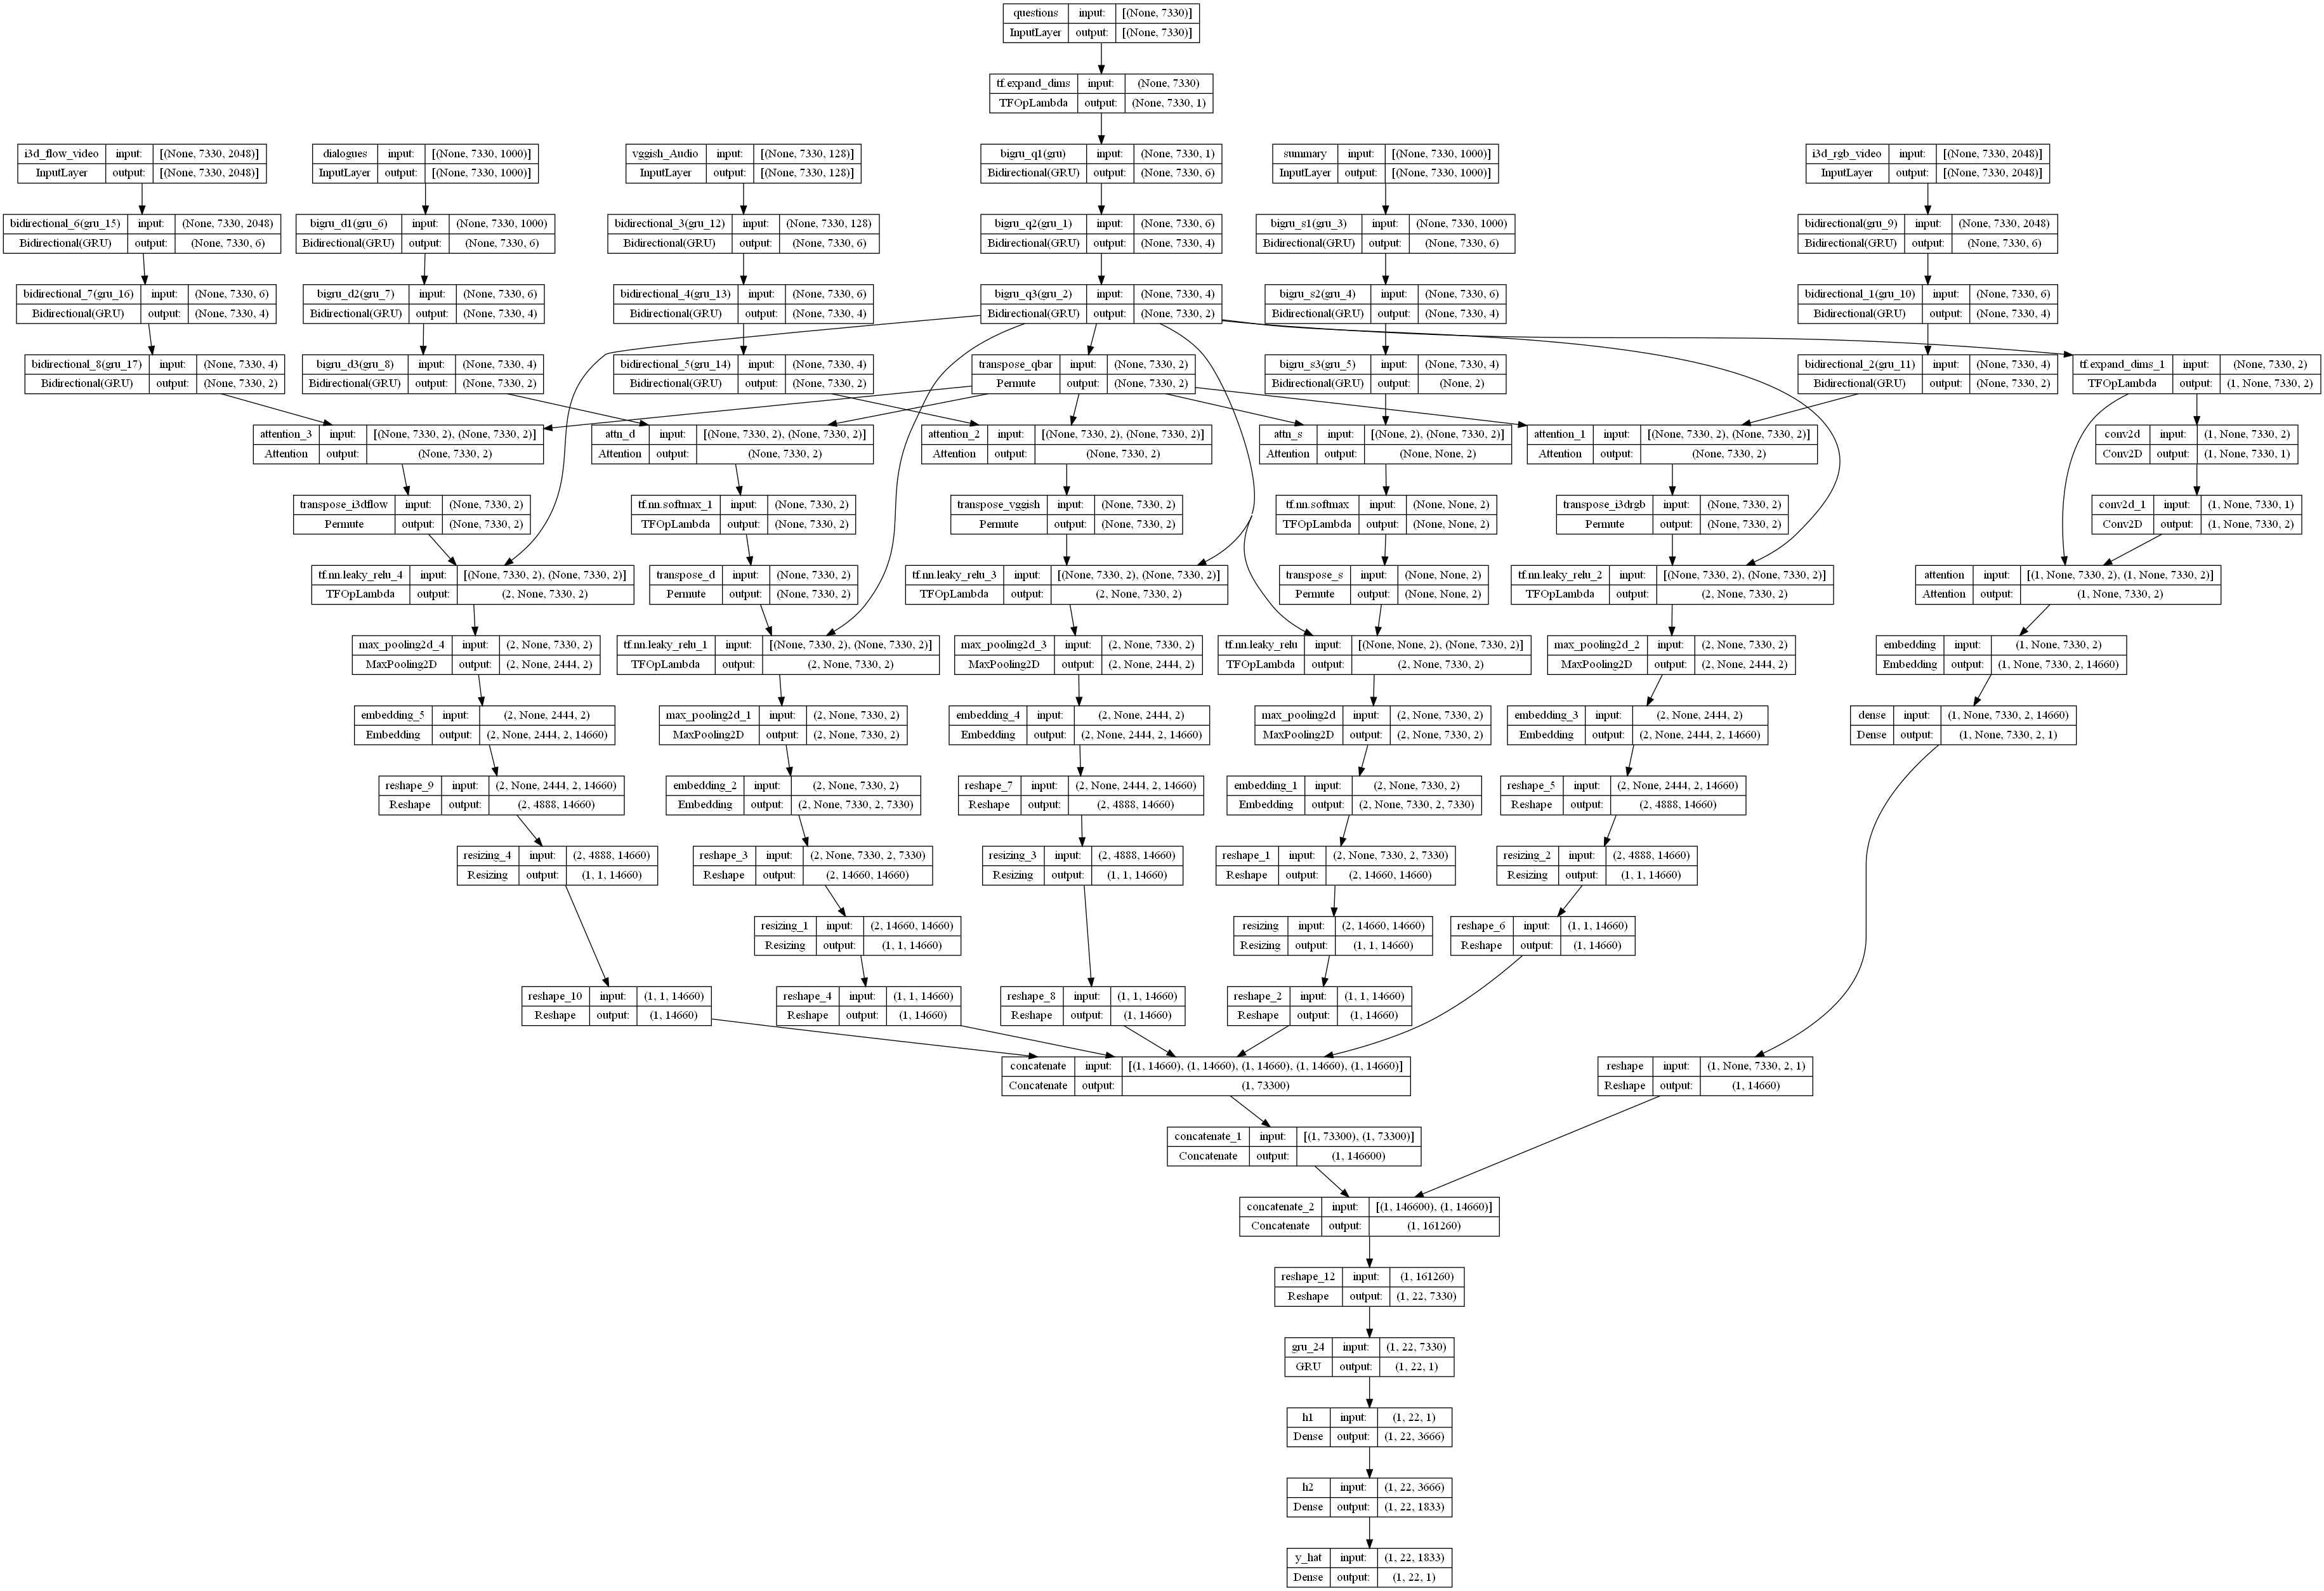

In [ ]:
#!pip install graphviz
#!pip install pydot
#import pydot, graphviz

tf.keras.utils.plot_model(model_final, show_shapes=True, show_layer_names=True, to_file='./model.png')
from IPython.display import Image
Image(filename='./model.png')


In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
le = preprocessing.LabelEncoder()
y_target_q = le.fit_transform(x_train['question'])
questions = torch.as_tensor(y_target_q)

y_target_s = le.fit_transform(x_train['summary'])
summary = torch.as_tensor(y_target_s)
summary = torch.as_tensor(summary)

y_target_d = le.fit_transform(x_train['caption'])
dialogues = torch.as_tensor(y_target_d)
dialogues = torch.as_tensor(dialogues)


Fit model

In [ ]:
model_final.compile(optimizer=optimizer, loss='mean_absolute_error', 
              metrics=['accuracy'])

In [ ]:
training = model_final.fit(x=[questions,summary,dialogues,i3d_flow,i3d_rgb,vggish_full], y=answers, batch_size=32, epochs=100, shuffle=True, verbose=0)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
vggish_full = tf.convert_to_tensor(vggish_full)
i3d_rgb = tf.convert_to_tensor(i3d_rgb)
#i3d_flow = tf.convert_to_tensor(i3d_flow)
dialogues = tf.convert_to_tensor(dialogues)
summary = tf.convert_to_tensor(summary)
questions = tf.convert_to_tensor(questions)
answers = tf.convert_to_tensor(answers)

In [ ]:
i3d_flow

array([array([[0.10737336, 0.        , 0.01086632, ..., 0.01382594, 0.01350603,
               0.        ],
              [0.14448591, 0.        , 0.00865465, ..., 0.03589866, 0.03097124,
               0.        ],
              [0.21619542, 0.00025097, 0.        , ..., 0.06320382, 0.15634394,
               0.        ],
              ...,
              [0.2145218 , 0.00273727, 0.0200429 , ..., 0.00618446, 0.03615896,
               0.        ],
              [0.14667583, 0.        , 0.01062533, ..., 0.04975802, 0.01262555,
               0.        ],
              [0.1357576 , 0.00932428, 0.00893406, ..., 0.03069305, 0.00308408,
               0.        ]])                                                   ,
       array([[0.12168607, 0.20364557, 0.00853349, ..., 0.09807272, 0.        ,
               0.00789456],
              [0.04184553, 0.16445331, 0.04433951, ..., 0.09786613, 0.0016421 ,
               0.        ],
              [0.05092878, 0.17668726, 0.13718162, ..., 0.017331

In [ ]:
#x11 = tf.convert_to_tensor(x11)
i3d_rgb

<tf.Tensor: shape=(39392, 49, 512), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.8357845 , ..., 1.0963383 ,
         0.        , 0.        ],
        [0.        , 0.        , 0.20251411, ..., 0.        ,
         0.        , 0.15283173],
        [0.40371868, 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.08540872, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 1.4465597 , 0.08390293, ..., 

In [ ]:
x11 = i3d_flow.reshape([1968,1])
x11.shape

(1968, 1)

In [ ]:
pred_ans = model.predict()

In [ ]:
loss = tf.keras.losses.categorical_crossentropy(answers, pred_ans)